<a href="https://colab.research.google.com/github/naoya1110/covid19-japan-7days-average/blob/main/covid19_jpn_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np

In [2]:
os.system("apt install subversion")
os.system("svn export https://github.com/CSSEGISandData/COVID-19/trunk/csse_covid_19_data/csse_covid_19_daily_reports")

0

In [3]:
DATA = "csse_covid_19_daily_reports"
filenames = sorted(os.listdir(DATA))

date_list = []

for filename in filenames:
    if ".csv" in filename:
        date_list.append(datetime.strptime(filename, '%m-%d-%Y.csv'))

date_list = sorted(date_list)
date_list = date_list[161:]
print(len(date_list))

437


In [4]:
pref_dict = {
            'Hokkaido': 53.81, 
            'Aomori': 13.08,
            'Iwate': 12.80, 
            'Miyagi': 23.34,              
            'Akita': 10.23,
            'Yamagata': 11.24,
            'Fukushima': 9.14,             
            'Ibaraki': 29.17,
            'Tochigi': 19.74,
            'Gunma': 19.73,              
            'Saitama': 72.67, 
            'Chiba': 62.23,
            'Tokyo': 135.15,
            'Kanagawa': 91.26,
            'Niigata': 23.04,             
            'Toyama': 10.66,
            'Ishikawa': 11.54,             
            'Fukui': 7.87, 
            'Yamanashi': 8.35,             
            'Nagano': 20.99, 
            'Gifu': 20.32,
            'Shizuoka': 37.00,           
            'Aichi': 74.83,
            'Mie': 18.16,
            'Shiga': 14.13, 
            'Kyoto': 26.10, 
            'Osaka': 88.39,
            'Hyogo': 55.35, 
            'Nara': 13.64, 
            'Wakayama': 9.64, 
            'Tottori': 5.73,
            'Shimane': 6.94,              
            'Okayama': 19.21,
            'Hiroshima': 28.44, 
            'Yamaguchi': 14.05, 
            'Tokushima': 7.56,              
            'Kagawa': 9.76, 
            'Ehime': 13.85,
            'Kochi': 7.28, 
            'Fukuoka': 54.54, 
            'Saga': 8.33,
            'Nagasaki': 13.77, 
            'Kumamoto': 17.86, 
            'Oita': 11.66, 
            'Miyazaki': 11.04,
            'Kagoshima': 16.48, 
            'Okinawa': 14.33, 
            }

prefectures = list(pref_dict.keys())

In [5]:
confirmed_daily_list = []

for date in tqdm(date_list):
    filename = date.strftime('%m-%d-%Y.csv')
    df = pd.read_csv(os.path.join(DATA, filename))

    for provice_column_name in ["Province_State", "Province State", "Province/State"]:
        if provice_column_name in df.columns:
            break

    confirmed_list = []

    for prefecture in prefectures:
        try:
            confirmed = int(df[df[provice_column_name]==prefecture]["Confirmed"])
        except:
            confirmed = 0
        #print(prefecture, confirmed)
        confirmed_list.append(confirmed)
    
    confirmed_daily_list.append(confirmed_list)

df_confirmed = pd.DataFrame(confirmed_daily_list)
df_confirmed.columns = prefectures
df_confirmed.insert(loc = 0, column= 'date', value= date_list)
df_confirmed.head()

  0%|          | 0/437 [00:00<?, ?it/s]

,date,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,Saitama,Chiba,Tokyo,Kanagawa,Niigata,Toyama,Ishikawa,Fukui,Yamanashi,Nagano,Gifu,Shizuoka,Aichi,Mie,Shiga,Kyoto,Osaka,Hyogo,Nara,Wakayama,Tottori,Shimane,Okayama,Hiroshima,Yamaguchi,Tokushima,Kagawa,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2020-07-01,1258,30,0,95,16,69,82,174,82,153,1146,971,6402,1508,83,227,300,122,75,76,157,82,523,45,103,383,1843,708,92,64,3,24,26,166,37,6,28,82,74,850,45,17,48,60,17,12,145
1,2020-07-02,1266,30,0,95,16,69,82,176,84,153,1166,982,6529,1520,83,228,300,122,75,76,160,83,523,45,103,386,1851,709,92,64,4,24,28,166,37,6,28,82,74,854,45,17,48,60,17,21,145
2,2020-07-03,1266,30,0,97,16,69,82,182,86,154,1191,992,6533,1545,83,228,300,122,75,76,160,87,523,45,103,391,1862,709,92,64,4,24,28,166,37,6,28,82,74,858,45,17,48,60,17,51,145
3,2020-07-04,1267,30,0,98,16,70,82,183,86,155,1218,1007,6664,1566,84,228,300,122,75,76,160,87,523,45,103,400,1879,711,93,64,4,24,28,166,37,6,28,82,74,864,45,18,48,60,17,85,145
4,2020-07-05,1268,30,0,98,16,71,82,183,87,155,1239,1014,6775,1586,84,228,300,122,75,76,160,87,523,45,103,401,1885,712,95,64,4,24,28,166,37,6,28,82,74,873,45,18,48,60,18,98,145


In [6]:
def do_analysis(prefecture="Kagawa", population=9.454):
    difference_list = []
    data = df_confirmed[prefecture]

    for i in range(len(date_list)-1):
        difference = data[i+1] - data[i]
        difference_list.append(difference)

    moving_ave_list = []

    for i in range(len(date_list)-7):
        ave = np.mean(difference_list[i:i+7])
        moving_ave_list.append(ave)

    moving_ave_per_population = np.array(moving_ave_list)/population

    return moving_ave_per_population

In [7]:
xticks = []
xtick_labels = []
for date in date_list:
    if date.strftime('%d')=="01" and int(date.strftime("%m"))%3==1:
        xticks.append(date)
        xtick_labels.append(int(date.strftime("%m")))

  0%|          | 0/47 [00:00<?, ?it/s]

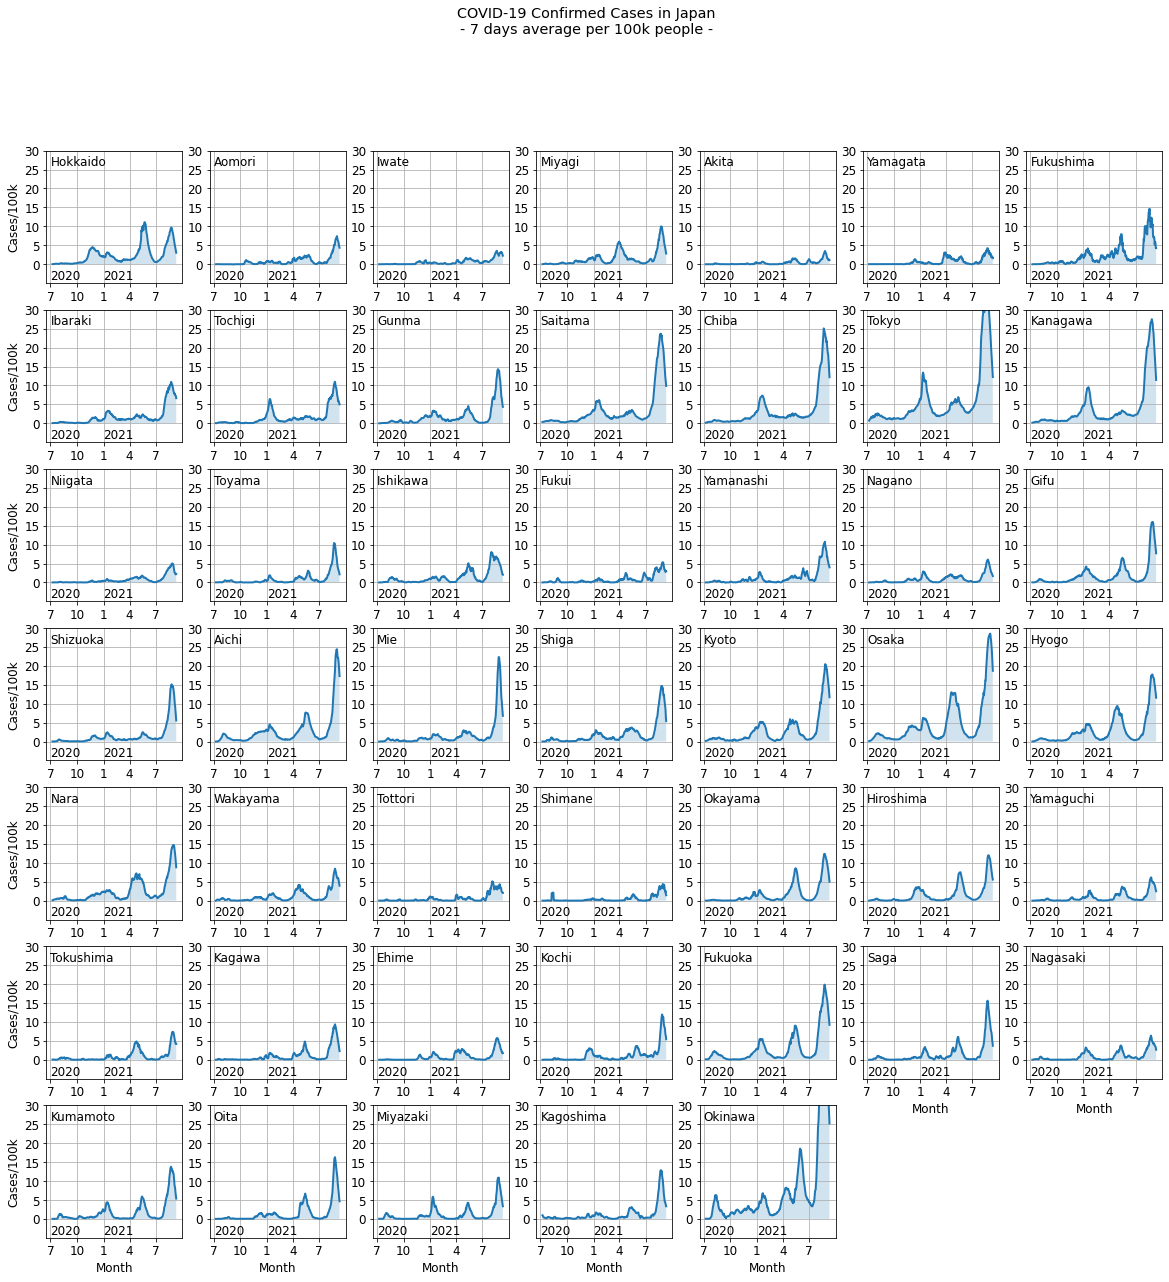

In [8]:
plt.figure(figsize=(20, 20))
plt.rcParams["font.size"]=12

for i, prefecture in enumerate(tqdm((prefectures))):
    population = pref_dict[prefecture]

    moving_ave = do_analysis(prefecture=prefecture, population=population)

    plt.subplot(7, 7, i+1)
    plt.fill_between(date_list[7:], 0, moving_ave, label=prefecture, alpha=0.2)
    plt.plot(date_list[7:], moving_ave, label=prefecture, lw=2)
    plt.xticks(xticks, xtick_labels)
    plt.ylim(-5, 30)
    plt.yticks(np.arange(0, 30.1, 5))
    plt.grid()
    plt.text(datetime.strptime("202007", "%Y%m"), 26, prefecture)
    plt.text(datetime.strptime("202007", "%Y%m"), -4, "2020")
    plt.text(datetime.strptime("202101", "%Y%m"), -4, "2021")
    plt.suptitle("COVID-19 Confirmed Cases in Japan\n- 7 days average per 100k people -")
    if i%7==0:
        plt.ylabel("Cases/100k")
    if i>=40:
        plt.xlabel("Month")